In [28]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('IRIS.csv')

In [29]:
# Display the first few rows
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [30]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [31]:
# Describe the dataset statistics
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#setting a dependent and independent variables
X = df.drop('species', axis=1)
y = df['species']

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [40]:
# train the model usinf RFC
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Make predictions
rf_pred = rf_model.predict(X_test)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test,rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Classifier
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



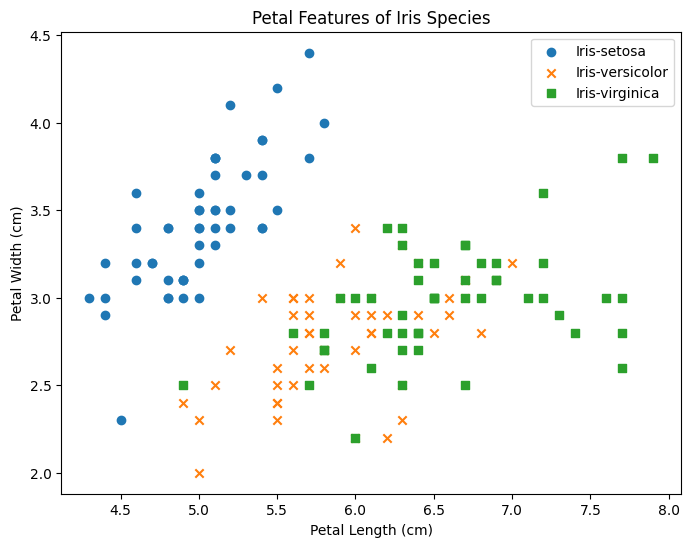

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df[df['species'] == 'Iris-setosa']['sepal_length'], df[df['species'] == 'Iris-setosa']['sepal_width'], label='Iris-setosa', marker='o')
plt.scatter(df[df['species'] == 'Iris-versicolor']['sepal_length'], df[df['species'] == 'Iris-versicolor']['sepal_width'], label='Iris-versicolor', marker='x')
plt.scatter(df[df['species'] == 'Iris-virginica']['sepal_length'], df[df['species'] == 'Iris-virginica']['sepal_width'], label='Iris-virginica', marker='s')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Features of Iris Species')
plt.legend()
plt.show()

In [51]:
def classify_iris():
  # Get user input for Iris features
  sepal_length = float(input("Enter sepal length (cm): "))
  sepal_width = float(input("Enter sepal width (cm): "))
  petal_length = float(input("Enter petal length (cm): "))
  petal_width = float(input("Enter petal width (cm): "))

  # Create input array and scale it using the previously fitted scaler
  input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
  scaled_input = scaler.transform(input_data)

  # Make prediction using the trained model
  prediction = rf_model.predict(scaled_input)[0]

  print(f"Predicted Iris species: {prediction}")

# Call the function to classify Iris based on user input
classify_iris()

Enter sepal length (cm): 1.3
Enter sepal width (cm): 1.5
Enter petal length (cm): 2
Enter petal width (cm): 1.6
Predicted Iris species: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
